In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_train = pd.read_csv('Datasets/train.csv', sep=',')
df_test = pd.read_csv('Datasets/test.csv', sep=',')
combine = pd.concat([df_train, df_test], axis=0, sort=False)
display(combine[885:895])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [25]:
df_train.shape, df_test.shape, combine.shape

((891, 12), (418, 11), (1309, 12))

In [26]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

**Title feature**

In [27]:
df_train['Name'].head(), df_train['Name'].tail()

(0                              Braund, Mr. Owen Harris
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...
 2                               Heikkinen, Miss. Laina
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
 4                             Allen, Mr. William Henry
 Name: Name, dtype: object, 886                       Montvila, Rev. Juozas
 887                Graham, Miss. Margaret Edith
 888    Johnston, Miss. Catherine Helen "Carrie"
 889                       Behr, Mr. Karl Howell
 890                         Dooley, Mr. Patrick
 Name: Name, dtype: object)

Extract the titles of each passenger

In [28]:
combine['Title'] = df_train['Name'].str.extract(r'(\w+)\.', expand=True)
# combine['Title'].head(10), combine['Title'].tail(10)
df_train['Title'] = combine['Title'][:891]
df_test['Title'] = combine['Title'][891:]

Consider groupings of titles

In [29]:
combine['Title'].describe(), combine['Title'].value_counts()

(count     1309
 unique      17
 top         Mr
 freq       745
 Name: Title, dtype: object, Mr          745
 Miss        283
 Mrs         183
 Master       63
 Dr           10
 Rev           9
 Major         2
 Don           2
 Col           2
 Mlle          2
 Mme           2
 Capt          1
 Jonkheer      1
 Ms            1
 Sir           1
 Countess      1
 Lady          1
 Name: Title, dtype: int64)

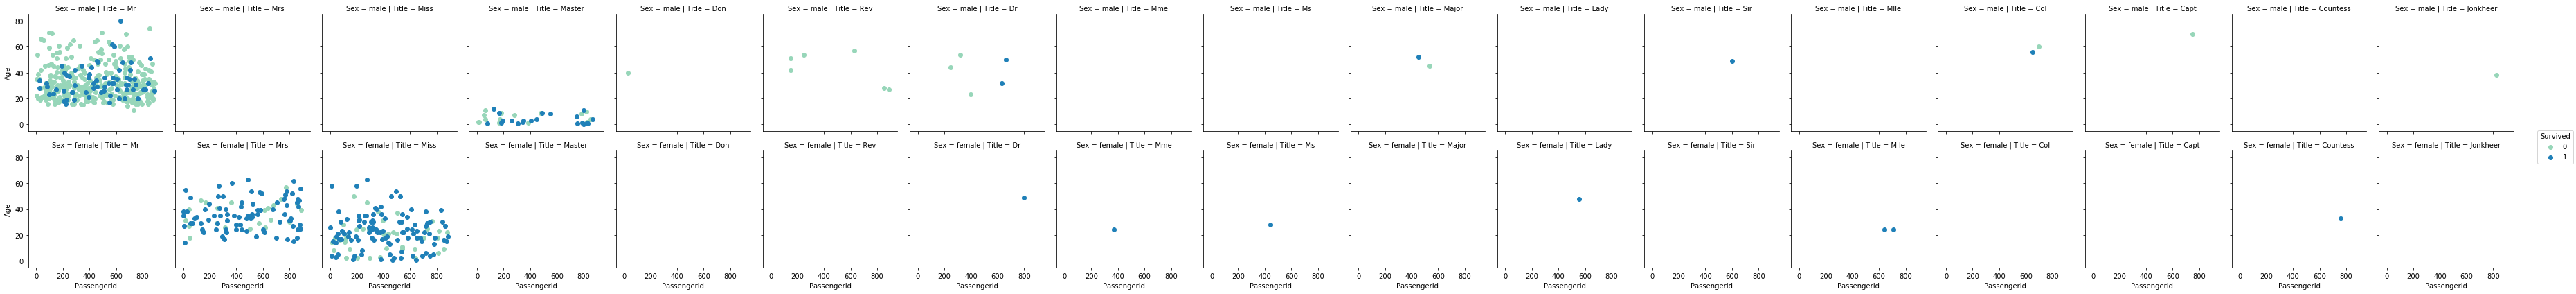

In [54]:
sns.set_palette('YlGnBu', 2)
g = sns.FacetGrid(df_train, col='Title', row='Sex', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

Survival rate by Title  
Mr: Low  
Mrs: High  
Miss: High  
Master: Mixed  
Don: 1 0  
Rev: 6 0s  
Dr: Mixed  
Mme: 1 1  
Ms: 1 1  
Major: Mixed  
Lady: 1 1  
Sir: 1 1  
Mlle: 2 1s  
Col: Mixed  
Capt: 1 0  
Countess: 1 1  
Jonkheer: 1 0  

Other Notes:  
Mr has age floor of ~ 16  
Mrs has age floor of ~ 18  
Master has age roof of ~ 16  
Dr has 5 male and 1 female. Male survival is mixed and female survived

**Title groups**  
Mr, Don, Rev, Dr, Major, Sir, Col, Capt, Jonkheer  
Mrs, Miss, Mme, Ms, Lady, Mlle, Countess  
Master

In [31]:
Title_dict = {'Mr': 1, 'Don': 1, 'Rev': 1, 'Dr': 1, 'Major': 1, 'Sir': 1, 'Col': 1, 'Capt': 1, 'Jonkheer': 1,
             'Mrs': 2, 'Miss': 2, 'Mme': 2, 'Ms': 2, 'Lady': 2, 'Mlle': 2, 'Countess': 2,
             'Master': 3}

combine['Title_cat'] = combine['Title'].map(Title_dict)

combine['Title_cat'].value_counts()
df_train['Title_cat'] = combine['Title_cat'][:891]
df_test['Title_cat'] = combine['Title_cat'][891:]

**Pclass**

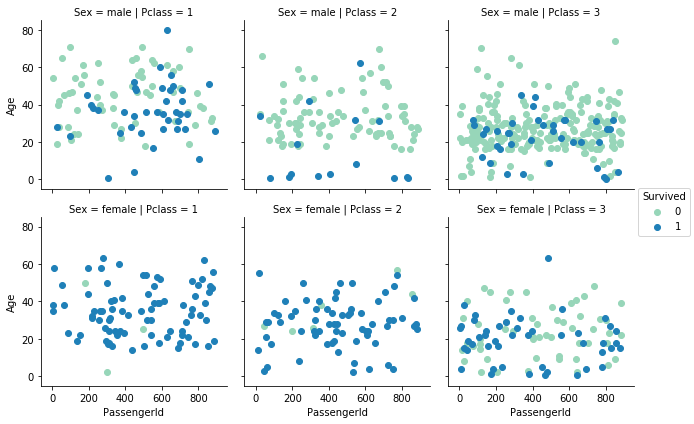

In [55]:
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

Men in first class have improved survival, but there is not a large difference between second and third.  
Women in first and second classes have greater survival than those in third.  

Most young passengers are in second or third class.

_Keep the Pclass feature as is_

In [33]:
df_train['Survived'].groupby([df_train['Pclass'], df_train['Sex']]).mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

**Embarked**

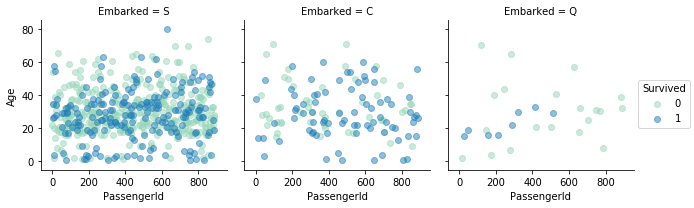

In [56]:
g = sns.FacetGrid(df_train, col='Embarked', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age', alpha=.5)
g.add_legend()

In [35]:
df_train['Survived'].groupby(df_train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Passengers embarking at C had the highest surivival rate.

Look at correlation of Embarked and Pclass.

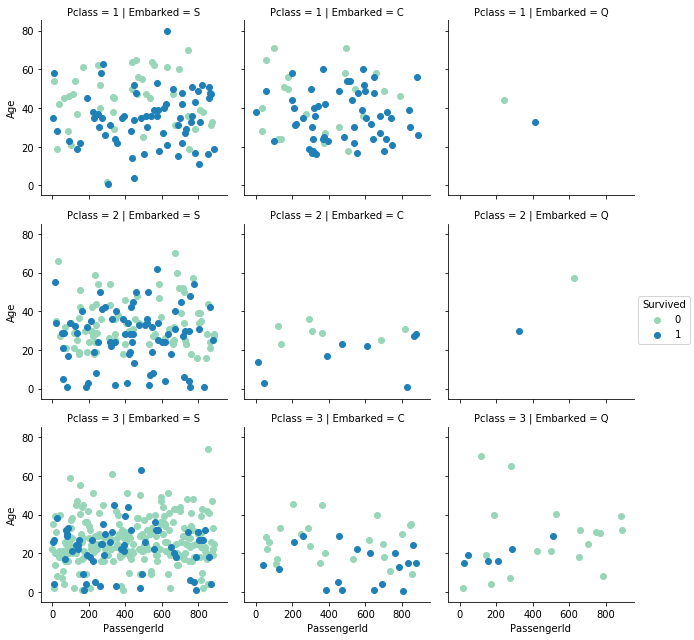

In [57]:
g = sns.FacetGrid(df_train, row='Pclass', col='Embarked', hue='Survived')
g = g.map(plt.scatter, 'PassengerId', 'Age')
g.add_legend()

In [37]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


At Port Q alone more passengers from Pclass 1 came aboard than from Pclass 3.
Correlation between Embarked and Pclass might affect Survival.

**Fare**

In [38]:
combine['Fare'].isnull().sum()

1

In [39]:
combine[combine['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_cat
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1


Need to fill missing value for PassengerId 1044 in df_test

In [40]:
df_test[df_test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_cat
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1
